# **Named Entity Recognition (NER) using NLP**
### Made By Hossam Eldeen Anwer

## Data Loading and Exploratory Data analysis

In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('/kaggle/input/ner-data/ner.csv')
df

,text,labels
0,Thousands of demonstrators have marched throug...,O O O O O O B-geo O O O O O B-geo O O O O O B-...
1,Iranian officials say they expect to get acces...,B-gpe O O O O O O O O O O O O O O B-tim O O O ...
2,Helicopter gunships Saturday pounded militant ...,O O B-tim O O O O O B-geo O O O O O B-org O O ...
3,They left after a tense hour-long standoff wit...,O O O O O O O O O O O
4,U.N. relief coordinator Jan Egeland said Sunda...,B-geo O O B-per I-per O B-tim O B-geo O B-gpe ...
...,...,...
47954,Opposition leader Mir Hossein Mousavi has said...,O O O B-per I-per O O O O O O O O O O O O O O ...
47955,"On Thursday , Iranian state media published a ...",O B-tim O B-gpe O O O O O O O O B-org I-org O ...
47956,"Following Iran 's disputed June 12 elections ,...",O B-geo O O B-tim I-tim O O O O O O O O O O O ...
47957,"Since then , authorities have held public tria...",O O O O O O O O O O O O O O O O O O O O O


In [10]:
df.describe()

,text,labels
count,47959,47959
unique,47575,33318
top,VOA 's Mil Arcega reports .,O O O O O O O O O O O
freq,17,450


In [11]:
df.isna().sum()

text      0
labels    0
dtype: int64

In [13]:
# Analyzing the distribution of labels
label_counts = df['labels'].apply(lambda x: x.split()).explode().value_counts()
print(label_counts)

labels
O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: count, dtype: int64


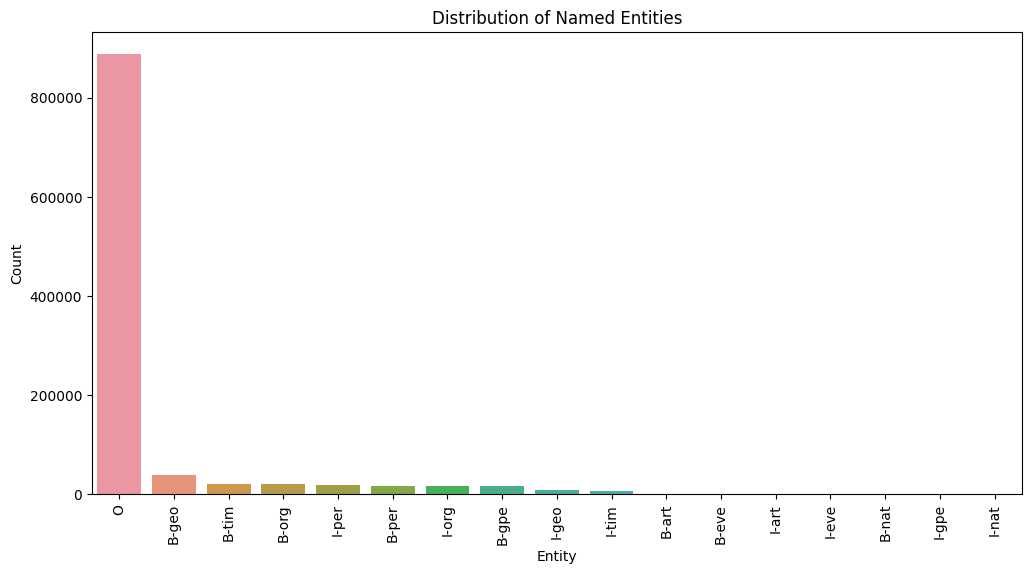

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the number of entities in each category
entity_counts = df['labels'].apply(lambda x: x.split()).explode().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=entity_counts.index, y=entity_counts.values)
plt.title('Distribution of Named Entities')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

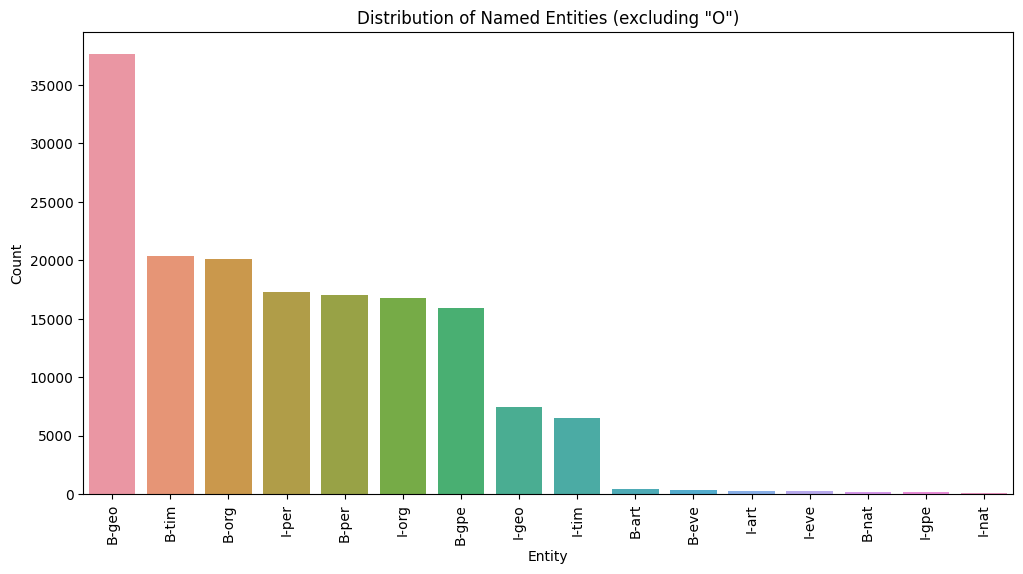

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the number of entities in each category, excluding 'O'
entity_counts = df['labels'].apply(lambda x: x.split()).explode().value_counts()
entity_counts = entity_counts[entity_counts.index != 'O']

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=entity_counts.index, y=entity_counts.values)
plt.title('Distribution of Named Entities (excluding "O")')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


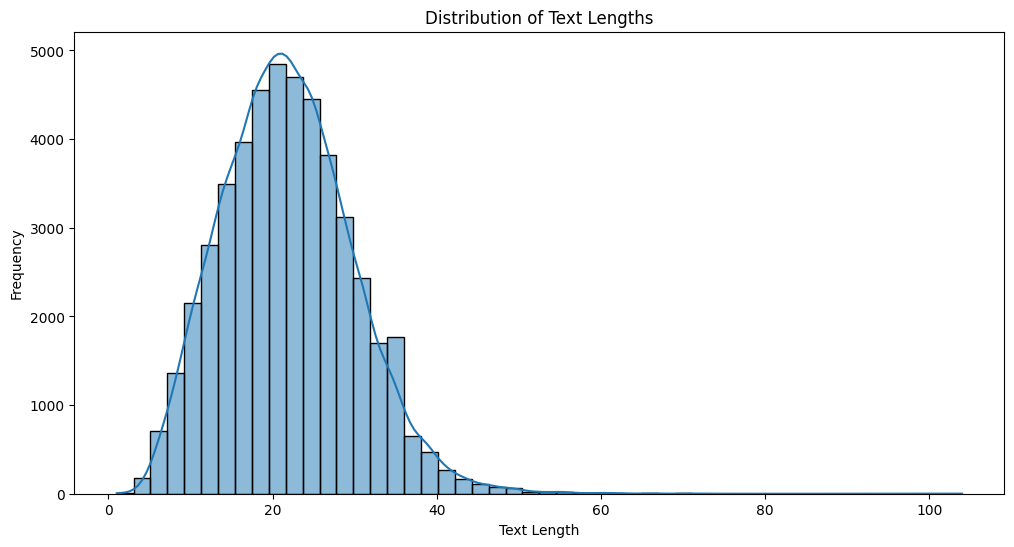

In [8]:
# Distribution of text lengths
text_lengths = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.histplot(text_lengths, bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

## **Baseline Experiment :-**

### 1- Data Preparation and Cleaning

In [14]:
df.duplicated().sum()

349

In [15]:
df = df.drop_duplicates().copy()
df

,text,labels
0,Thousands of demonstrators have marched throug...,O O O O O O B-geo O O O O O B-geo O O O O O B-...
1,Iranian officials say they expect to get acces...,B-gpe O O O O O O O O O O O O O O B-tim O O O ...
2,Helicopter gunships Saturday pounded militant ...,O O B-tim O O O O O B-geo O O O O O B-org O O ...
3,They left after a tense hour-long standoff wit...,O O O O O O O O O O O
4,U.N. relief coordinator Jan Egeland said Sunda...,B-geo O O B-per I-per O B-tim O B-geo O B-gpe ...
...,...,...
47954,Opposition leader Mir Hossein Mousavi has said...,O O O B-per I-per O O O O O O O O O O O O O O ...
47955,"On Thursday , Iranian state media published a ...",O B-tim O B-gpe O O O O O O O O B-org I-org O ...
47956,"Following Iran 's disputed June 12 elections ,...",O B-geo O O B-tim I-tim O O O O O O O O O O O ...
47957,"Since then , authorities have held public tria...",O O O O O O O O O O O O O O O O O O O O O


In [16]:
# Initial tokenization 
df['text_tokens'] = df['text'].apply(lambda x: x.split())
df['label_tokens'] = df['labels'].apply(lambda x: x.split())
df

,text,labels,text_tokens,label_tokens
0,Thousands of demonstrators have marched throug...,O O O O O O B-geo O O O O O B-geo O O O O O B-...,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo..."
1,Iranian officials say they expect to get acces...,B-gpe O O O O O O O O O O O O O O B-tim O O O ...,"[Iranian, officials, say, they, expect, to, ge...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,..."
2,Helicopter gunships Saturday pounded militant ...,O O B-tim O O O O O B-geo O O O O O B-org O O ...,"[Helicopter, gunships, Saturday, pounded, mili...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O..."
3,They left after a tense hour-long standoff wit...,O O O O O O O O O O O,"[They, left, after, a, tense, hour-long, stand...","[O, O, O, O, O, O, O, O, O, O, O]"
4,U.N. relief coordinator Jan Egeland said Sunda...,B-geo O O B-per I-per O B-tim O B-geo O B-gpe ...,"[U.N., relief, coordinator, Jan, Egeland, said...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo..."
...,...,...,...,...
47954,Opposition leader Mir Hossein Mousavi has said...,O O O B-per I-per O O O O O O O O O O O O O O ...,"[Opposition, leader, Mir, Hossein, Mousavi, ha...","[O, O, O, B-per, I-per, O, O, O, O, O, O, O, O..."
47955,"On Thursday , Iranian state media published a ...",O B-tim O B-gpe O O O O O O O O B-org I-org O ...,"[On, Thursday, ,, Iranian, state, media, publi...","[O, B-tim, O, B-gpe, O, O, O, O, O, O, O, O, B..."
47956,"Following Iran 's disputed June 12 elections ,...",O B-geo O O B-tim I-tim O O O O O O O O O O O ...,"[Following, Iran, 's, disputed, June, 12, elec...","[O, B-geo, O, O, B-tim, I-tim, O, O, O, O, O, ..."
47957,"Since then , authorities have held public tria...",O O O O O O O O O O O O O O O O O O O O O,"[Since, then, ,, authorities, have, held, publ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [17]:
# Check alignment
alignment_check = df.apply(lambda row: len(row['text_tokens']) == len(row['label_tokens']), axis=1)
print("Alignment check:", alignment_check.all())

Alignment check: False


In [18]:
# Find rows with alignment issues
alignment_issues = df[df.apply(lambda row: len(row['text_tokens']) != len(row['label_tokens']), axis=1)].copy()
alignment_issues

,text,labels,text_tokens,label_tokens
61,In a telephone interview to discuss the issues...,O O O O O O O O O O O O O B-org O B-per I-per ...,"[In, a, telephone, interview, to, discuss, the...","[O, O, O, O, O, O, O, O, O, O, O, O, O, B-org,..."
10910,He says they and about 300 party supporters ar...,O O O O O O O O O O O O O O O O O O O O O O O ...,"[He, says, they, and, about, 300, party, suppo...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
21088,Girls Write Now pairs teenage girls with prof...,O O O O O O O O O O O O O O O O O O O,"[Girls, Write, Now, pairs, teenage, girls, wit...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
23806,The medical aid group Doctors Without Borders ...,O O O O O B-org I-org I-org O O O O O O O O O ...,"[The, medical, aid, group, Doctors, Without, B...","[O, O, O, O, O, B-org, I-org, I-org, O, O, O, ..."
26284,The cholera epidemic ravaging Zimbabwe has com...,O O O O B-org O O O O O O O O O O O O O O O O ...,"[The, cholera, epidemic, ravaging, Zimbabwe, h...","[O, O, O, O, B-org, O, O, O, O, O, O, O, O, O,..."
26911,"At the bird flu conference in Beijing , FAO De...",O O O O O O B-geo O B-org O O B-per I-per O B-...,"[At, the, bird, flu, conference, in, Beijing, ...","[O, O, O, O, O, O, B-geo, O, B-org, O, O, B-pe..."
26915,He says if bird flu were to become rooted in t...,O O O O O O O O O O O O B-gpe O O O O O O O O ...,"[He, says, if, bird, flu, were, to, become, ro...","[O, O, O, O, O, O, O, O, O, O, O, O, B-gpe, O,..."
32547,He told English to Africa reporter William Eag...,O O B-per O B-geo O B-org I-org O O O O O O O ...,"[He, told, English, to, Africa, reporter, Will...","[O, O, B-per, O, B-geo, O, B-org, I-org, O, O,..."
37047,The group says monitors should also have acces...,O O O O O O O O O O O O O O O O O O O O O O O O O,"[The, group, says, monitors, should, also, hav...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
41316,Ariel Ticona 's wife gave birth to their daugh...,B-per I-per O O O O O O O O B-org I-org B-gpe ...,"[Ariel, Ticona, 's, wife, gave, birth, to, the...","[B-per, I-per, O, O, O, O, O, O, O, O, B-org, ..."


In [19]:
# Identify indices of rows with alignment issues
alignment_issues_indices = alignment_issues.index

# Drop rows with alignment issues from the original DataFrame
df = df.drop(alignment_issues_indices)

# Reseting index
df.reset_index(drop=True, inplace=True)
df

,text,labels,text_tokens,label_tokens
0,Thousands of demonstrators have marched throug...,O O O O O O B-geo O O O O O B-geo O O O O O B-...,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo..."
1,Iranian officials say they expect to get acces...,B-gpe O O O O O O O O O O O O O O B-tim O O O ...,"[Iranian, officials, say, they, expect, to, ge...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,..."
2,Helicopter gunships Saturday pounded militant ...,O O B-tim O O O O O B-geo O O O O O B-org O O ...,"[Helicopter, gunships, Saturday, pounded, mili...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O..."
3,They left after a tense hour-long standoff wit...,O O O O O O O O O O O,"[They, left, after, a, tense, hour-long, stand...","[O, O, O, O, O, O, O, O, O, O, O]"
4,U.N. relief coordinator Jan Egeland said Sunda...,B-geo O O B-per I-per O B-tim O B-geo O B-gpe ...,"[U.N., relief, coordinator, Jan, Egeland, said...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo..."
...,...,...,...,...
47592,Opposition leader Mir Hossein Mousavi has said...,O O O B-per I-per O O O O O O O O O O O O O O ...,"[Opposition, leader, Mir, Hossein, Mousavi, ha...","[O, O, O, B-per, I-per, O, O, O, O, O, O, O, O..."
47593,"On Thursday , Iranian state media published a ...",O B-tim O B-gpe O O O O O O O O B-org I-org O ...,"[On, Thursday, ,, Iranian, state, media, publi...","[O, B-tim, O, B-gpe, O, O, O, O, O, O, O, O, B..."
47594,"Following Iran 's disputed June 12 elections ,...",O B-geo O O B-tim I-tim O O O O O O O O O O O ...,"[Following, Iran, 's, disputed, June, 12, elec...","[O, B-geo, O, O, B-tim, I-tim, O, O, O, O, O, ..."
47595,"Since then , authorities have held public tria...",O O O O O O O O O O O O O O O O O O O O O,"[Since, then, ,, authorities, have, held, publ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [20]:
# Re-check alignment in the cleaned DataFrame
alignment_check_cleaned = df.apply(lambda row: len(row['text_tokens']) == len(row['label_tokens']), axis=1)
print("Alignment check after cleaning:", alignment_check_cleaned.all())

Alignment check after cleaning: True


### 2- Baseline Model Training

In [21]:
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")


Training set size: 38077
Validation set size: 4760
Test set size: 4760


In [22]:
!pip install sklearn-crfsuite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.0 MB/s eta 0:00:0000:01


In [23]:
import nltk
from sklearn_crfsuite import CRF, metrics

# Download the necessary NLTK resources for POS tagging
nltk.download('averaged_perceptron_tagger')

def word2features(sent, i):
    """
    Extract features for a specific word in a sentence.

    Args:
        sent (list of str): A list of words in the sentence.
        i (int): The index of the word in the sentence.

    Returns:
        dict: A dictionary of features for the word at index `i`.
    """
    word = sent[i]
    features = {
        'bias': 1.0,  # Bias feature to help the model learn the offset
        'word.lower()': word.lower(),  # Lowercase version of the word
        'word[-3:]': word[-3:],  # Last 3 characters of the word
        'word[-2:]': word[-2:],  # Last 2 characters of the word
        'word.isupper()': word.isupper(),  # Check if the word is uppercase
        'word.istitle()': word.istitle(),  # Check if the word is a title case
        'word.isdigit()': word.isdigit(),  # Check if the word is a digit
    }
    
    # Add features from the previous word if it exists
    if i > 0:
        word1 = sent[i-1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
        })
    else:
        features['BOS'] = True  # Mark the beginning of the sentence

    # Add features from the next word if it exists
    if i < len(sent)-1:
        word1 = sent[i+1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
        })
    else:
        features['EOS'] = True  # Mark the end of the sentence

    return features

def sent2features(sent):
    """
    Convert a sentence into a list of feature dictionaries for each word.

    Args:
        sent (list of str): A list of words in the sentence.

    Returns:
        list of dict: A list of feature dictionaries for each word in the sentence.
    """
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    """
    Convert a sentence into a list of labels.

    Args:
        sent (list of str): A list of labels for each word in the sentence.

    Returns:
        list of str: A list of labels for each word in the sentence.
    """
    return sent

def sent2tokens(sent):
    """
    Convert a sentence into a list of tokens.

    Args:
        sent (list of str): A list of tokens in the sentence.

    Returns:
        list of str: A list of tokens in the sentence.
    """
    return sent

# Extract features and labels from the training, validation, and test data
X_train = [sent2features(s) for s in train_df['text_tokens']]  # Feature extraction for training data
y_train = [sent2labels(s) for s in train_df['label_tokens']]  # Label extraction for training data

X_val = [sent2features(s) for s in val_df['text_tokens']]  # Feature extraction for validation data
y_val = [sent2labels(s) for s in val_df['label_tokens']]  # Label extraction for validation data

X_test = [sent2features(s) for s in test_df['text_tokens']]  # Feature extraction for test data
y_test = [sent2labels(s) for s in test_df['label_tokens']]  # Label extraction for test data

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [24]:
# Initializing the CRF model
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False
)

# Training the model
crf.fit(X_train, y_train)

CRF(algorithm='lbfgs', all_possible_transitions=False, c1=0.1, c2=0.1,
    max_iterations=100)

In [25]:
# Predict on the validation set
y_pred = crf.predict(X_val)

### 3- Evaluation

In [26]:
# Evaluate the model
labels = list(crf.classes_)
labels.remove('O')

# Predict on the test set
y_test_pred = crf.predict(X_test)

# Calculate metrics
f1_score = metrics.flat_f1_score(y_test, y_test_pred, average='weighted', labels=labels)
classification_report = metrics.flat_classification_report(y_test, y_test_pred, labels=labels, digits=3)

print(f"F1 Score: {f1_score}")
print("Classification Report:\n", classification_report)

F1 Score: 0.8451049020241077
Classification Report:
               precision    recall  f1-score   support

       B-geo      0.865     0.898     0.881      3747
       B-per      0.852     0.828     0.840      1658
       I-per      0.851     0.881     0.866      1683
       B-org      0.793     0.735     0.763      2026
       B-gpe      0.961     0.934     0.948      1519
       B-tim      0.919     0.867     0.892      1981
       I-org      0.800     0.810     0.804      1680
       I-geo      0.845     0.761     0.801       733
       I-tim      0.811     0.715     0.760       624
       B-eve      0.484     0.385     0.429        39
       B-nat      0.750     0.517     0.612        29
       I-gpe      0.750     0.462     0.571        13
       B-art      0.312     0.139     0.192        36
       I-nat      0.714     0.556     0.625         9
       I-eve      0.348     0.296     0.320        27
       I-art      0.316     0.158     0.211        38

   micro avg      0.856    

In [27]:
# Display only the first 3 results
for i, (text, true, pred) in enumerate(zip(test_df['text_tokens'].tolist(), y_test, y_test_pred)):
    if i >= 3:
        break
    print(f"Text: {text}")
    print(f"True: {true}")
    print(f"Pred: {pred}")
    print()

Text: ['He', 'called', 'Russia', "'s", 'action', '"', 'incompatible', 'with', 'peaceful', 'relations', 'with', 'its', 'sovereign', 'and', 'democratic', 'neighbor', '.', '"']
True: ['O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Pred: ['O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

Text: ['Azerbaijan', "'s", 'oil', 'production', 'increased', 'dramatically', 'in', '1997', ',', 'when', 'Azerbaijan', 'signed', 'the', 'first', 'production-sharing', 'arrangement', '(', 'PSA', ')', 'with', 'the', 'Azerbaijan', 'International', 'Operating', 'Company', '.']
True: ['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'B-tim', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'B-org', 'O', 'O', 'O', 'B-gpe', 'B-org', 'I-org', 'I-org', 'O']
Pred: ['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'B-tim', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'B-org', 'O', 'O', 'O', 'B-org', 'I-org', 'I-org', 'I-org', 'O']

Text: ['Oil

In [28]:
import joblib

# Save the model
joblib.dump(crf, 'ner_crf_model.pkl')

['ner_crf_model.pkl']

## **Advanced Experiments :-**

## Experiment 1: Additional Features

In [41]:
import nltk
from tqdm import tqdm

# Download the NLTK part-of-speech tagger data if not already present
nltk.download('averaged_perceptron_tagger')

def word2features_extended(sent, i):
    """
    Extract features for a specific word in a sentence.
    
    Parameters:
    - sent: List of words (tokens) in the sentence.
    - i: Index of the word in the sentence for which to extract features.

    Returns:
    - Dictionary of features for the word at index i.
    """
    word = sent[i]  # The word at index i
    postag = nltk.pos_tag([word])[0][1]  # POS tag of the word
    
    features = {
        'bias': 1.0,  # Bias feature for the model
        'word.lower()': word.lower(),  # Lowercase version of the word
        'word[-3:]': word[-3:],  # Last 3 characters of the word
        'word[-2:]': word[-2:],  # Last 2 characters of the word
        'word.isupper()': word.isupper(),  # Whether the word is uppercase
        'word.istitle()': word.istitle(),  # Whether the word is title-cased
        'word.isdigit()': word.isdigit(),  # Whether the word is a digit
        'postag': postag,  # POS tag of the word
    }
    
    # Add features for the previous word if it exists
    if i > 0:
        word1 = sent[i-1]
        postag1 = nltk.pos_tag([word1])[0][1]
        features.update({
            '-1:word.lower()': word1.lower(),  # Lowercase version of the previous word
            '-1:word.istitle()': word1.istitle(),  # Whether the previous word is title-cased
            '-1:word.isupper()': word1.isupper(),  # Whether the previous word is uppercase
            '-1:postag': postag1,  # POS tag of the previous word
        })
    else:
        features['BOS'] = True  # Beginning of Sentence (BOS) indicator
    
    # Add features for the next word if it exists
    if i < len(sent)-1:
        word1 = sent[i+1]
        postag1 = nltk.pos_tag([word1])[0][1]
        features.update({
            '+1:word.lower()': word1.lower(),  # Lowercase version of the next word
            '+1:word.istitle()': word1.istitle(),  # Whether the next word is title-cased
            '+1:word.isupper()': word1.isupper(),  # Whether the next word is uppercase
            '+1:postag': postag1,  # POS tag of the next word
        })
    else:
        features['EOS'] = True  # End of Sentence (EOS) indicator
    
    return features

def sent2features_extended(sent):
    """
    Extract features for all words in a sentence.
    
    Parameters:
    - sent: List of words (tokens) in the sentence.
    
    Returns:
    - List of feature dictionaries, one for each word in the sentence.
    """
    return [word2features_extended(sent, i) for i in range(len(sent))]

def extract_features_with_progress(sentences):
    """
    Extract features for a list of sentences with a progress bar.
    
    Parameters:
    - sentences: List of sentences, where each sentence is a list of words (tokens).
    
    Returns:
    - List of feature lists, each corresponding to a sentence.
    """
    features = []
    with tqdm(total=len(sentences), desc="Extracting Features") as pbar:
        for sent in sentences:
            features.append(sent2features_extended(sent))  # Extract features for each sentence
            pbar.update(1)  # Update progress bar
    return features

# Extract extended features for training, validation, and test sets
X_train_extended = extract_features_with_progress(train_df['text_tokens'])
X_val_extended = extract_features_with_progress(val_df['text_tokens'])
X_test_extended = extract_features_with_progress(test_df['text_tokens'])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


100%|██████████| 4760/4760 [00:54<00:00, 88.10it/s] 


In [44]:
# Train the model with extended features
crf_extended = CRF(algorithm='lbfgs', c1=0.1, c2=0.1, max_iterations=100, all_possible_transitions=False)
crf_extended.fit(X_train_extended, y_train)

CRF(algorithm='lbfgs', all_possible_transitions=False, c1=0.1, c2=0.1,
    max_iterations=100)

In [45]:
# Predict on the validation set
y_pred_extended = crf_extended.predict(X_val_extended)

# Evaluate the model
f1_score_extended = metrics.flat_f1_score(y_val, y_pred_extended, average='weighted', labels=labels)
classification_report_extended = metrics.flat_classification_report(y_val, y_pred_extended, labels=labels, digits=3)

print(f"F1 Score (Extended): {f1_score_extended}")
print("Classification Report (Extended):\n", classification_report_extended)

F1 Score (Extended): 0.8485094409029775
Classification Report (Extended):
               precision    recall  f1-score   support

       B-geo      0.851     0.908     0.879      3756
       B-per      0.847     0.834     0.840      1668
       I-per      0.846     0.908     0.876      1681
       B-org      0.795     0.715     0.753      2013
       B-gpe      0.961     0.925     0.943      1612
       B-tim      0.932     0.892     0.911      2037
       I-org      0.831     0.780     0.804      1757
       I-geo      0.802     0.836     0.818       760
       I-tim      0.859     0.761     0.807       673
       B-eve      0.412     0.269     0.326        26
       B-nat      0.400     0.182     0.250        11
       I-gpe      0.778     0.583     0.667        24
       B-art      0.533     0.170     0.258        47
       I-nat      0.333     1.000     0.500         1
       I-eve      0.250     0.143     0.182        28
       I-art      0.333     0.067     0.111        45

   mi

In [46]:
# Predict on the test set using the extended feature set model
y_test_pred = crf_extended.predict(X_test_extended)

# Calculate metrics
f1_score_test = metrics.flat_f1_score(y_test, y_test_pred, average='weighted', labels=labels)
classification_report_test = metrics.flat_classification_report(y_test, y_test_pred, labels=labels, digits=3)

print(f"F1 Score (Test): {f1_score_test}")
print("Classification Report (Test):\n", classification_report_test)

# Display only the first 3 results
for i, (text, true, pred) in enumerate(zip(test_df['text_tokens'].tolist(), y_test, y_test_pred)):
    if i >= 3:
        break
    print(f"Text: {text}")
    print(f"True: {true}")
    print(f"Pred: {pred}")
    print()

F1 Score (Test): 0.8478534013953133
Classification Report (Test):
               precision    recall  f1-score   support

       B-geo      0.864     0.902     0.882      3747
       B-per      0.849     0.831     0.840      1658
       I-per      0.853     0.884     0.868      1683
       B-org      0.803     0.732     0.766      2026
       B-gpe      0.962     0.935     0.949      1519
       B-tim      0.920     0.870     0.894      1981
       I-org      0.814     0.807     0.810      1680
       I-geo      0.838     0.775     0.805       733
       I-tim      0.816     0.731     0.771       624
       B-eve      0.484     0.385     0.429        39
       B-nat      0.789     0.517     0.625        29
       I-gpe      0.600     0.462     0.522        13
       B-art      0.429     0.167     0.240        36
       I-nat      0.714     0.556     0.625         9
       I-eve      0.333     0.296     0.314        27
       I-art      0.500     0.184     0.269        38

   micro avg 

## **Pipeline for Direct Use**

In [6]:
# Run this cell only if you haven't download this library before
!pip install sklearn-crfsuite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.0 MB/s eta 0:00:0000:010:01


In [9]:
import nltk
nltk.download('averaged_perceptron_tagger')

def word2features(sent, i):
    word = sent[i]
    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
    }
    if i > 0:
        word1 = sent[i-1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
        })
    else:
        features['EOS'] = True

    return features

def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return sent

def sent2tokens(sent):
    return sent

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [10]:
tag_map = {
    'O': 'Other',
    'B-geo': 'Geopolitical Entity (Beginning)',
    'B-tim': 'Time Expression (Beginning)',
    'B-org': 'Organization (Beginning)',
    'I-per': 'Person (Inside)',
    'B-per': 'Person (Beginning)',
    'I-org': 'Organization (Inside)',
    'B-gpe': 'Geopolitical Entity (Beginning)',
    'I-geo': 'Geopolitical Entity (Inside)',
    'I-tim': 'Time Expression (Inside)',
    'B-art': 'Artifact (Beginning)',
    'B-eve': 'Event (Beginning)',
    'I-art': 'Artifact (Inside)',
    'I-eve': 'Event (Inside)',
    'B-nat': 'Nationality or Religious Group (Beginning)',
    'I-gpe': 'Geopolitical Entity (Inside)',
    'I-nat': 'Nationality or Religious Group (Inside)'
}

# Function to convert tags to their real names
def convert_tags_to_names(tags):
    return [tag_map.get(tag, tag) for tag in tags]

import joblib

# Function to process new input and return predictions with real names
def predict_ner(text, model_path='/kaggle/input/model-weights/ner_crf_model.pkl'):
    # Load the model
    crf = joblib.load(model_path)
    
    # Preprocess the input text
    text_tokens = text.split()
    features = sent2features(text_tokens)
    
    # Predict NER labels
    pred_labels = crf.predict([features])[0]
    
    # Convert tags to real names
    pred_labels_named = convert_tags_to_names(pred_labels)
    
    return list(zip(text_tokens, pred_labels_named))

In [11]:
# Test the prediction pipeline
new_text = "Apple Inc. is headquartered in Cupertino, California."
predictions = predict_ner(new_text)
print(predictions)

[('Apple', 'Organization (Beginning)'), ('Inc.', 'Organization (Inside)'), ('is', 'Other'), ('headquartered', 'Other'), ('in', 'Other'), ('Cupertino,', 'Geopolitical Entity (Beginning)'), ('California.', 'Geopolitical Entity (Inside)')]
